<a href="https://colab.research.google.com/github/GauravSahani1417/Kaggle-Datasets/blob/master/Feature_selection_Techniques_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mobile_Train.csv')

In [ ]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df.iloc[:,0:20] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [ ]:
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


Variance Threshold:

In [ ]:
# Filter Method for Feature Selection
from sklearn. feature_selection import VarianceThreshold

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset/Mobile_Train.csv')

In [ ]:
df1.shape

(2000, 21)

In [ ]:
thresh_filter= VarianceThreshold(threshold=0.1)
transformed_data=thresh_filter.fit_transform(df1)

In [ ]:
transformed_data.shape

(2000, 20)

Heat Maps:

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/Mobile_Train.csv')

In [ ]:
X = df.iloc[:,0:20] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

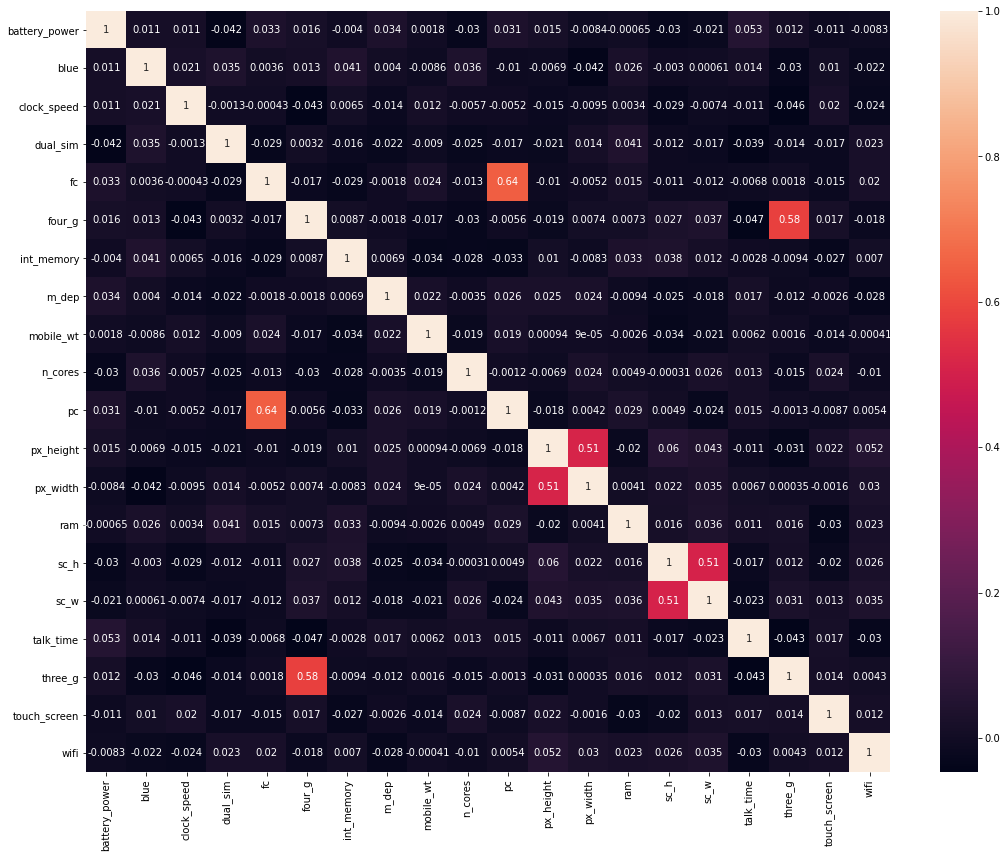

In [ ]:
df=pd.DataFrame(X)
corrmat=df.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corrmat, annot=True)
plt.show()

Wrapper Method:

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn. feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
data=fetch_california_housing()
X=data["data"]
col_names= data["feature_names"]
Y=data["target"]

In [ ]:
df_N1 = pd.DataFrame(X)
df_N1.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#initialize the model
model=LinearRegression()

In [ ]:
# initialize RFE
rfe=RFE(estimator=model,n_features_to_select=3)

In [ ]:
#fit RFE
rfe.fit(X,Y)
# get the transformed data with selected columns
X_transformed=rfe.transform(X)

In [ ]:
df_N=pd.DataFrame(X_transformed)

In [ ]:
df_N.head()

,0,1,2
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
